## Logistic Regression

#### 공부시간에 따른 자격증 시험 합격 가능성

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
dataset = pd.read_csv('LogisticRegressionData.csv')
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

print(x)
print(y)
print(dataset)

[[ 0.5]
 [ 1.2]
 [ 1.8]
 [ 2.4]
 [ 2.6]
 [ 3.2]
 [ 3.9]
 [ 4.4]
 [ 4.5]
 [ 5. ]
 [ 5.3]
 [ 5.8]
 [ 6. ]
 [ 6.1]
 [ 6.2]
 [ 6.9]
 [ 7.2]
 [ 8.4]
 [ 8.6]
 [10. ]]
[0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1]
    hour  pass
0    0.5     0
1    1.2     0
2    1.8     0
3    2.4     0
4    2.6     0
5    3.2     0
6    3.9     0
7    4.4     1
8    4.5     0
9    5.0     1
10   5.3     1
11   5.8     0
12   6.0     1
13   6.1     1
14   6.2     1
15   6.9     1
16   7.2     1
17   8.4     1
18   8.6     1
19  10.0     1


#### 데이터 분리

In [33]:
#데이터분리
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2, random_state=0)


#### 학습(로지스틱회귀)

In [34]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(train_x,train_y)

LogisticRegression()

In [35]:
classifier.predict([[6]])
#결과 1 : 합격할 것으로 예측

classifier.predict([[4]])
#결과 0 : 불합격 할 것으로 예측


array([0], dtype=int64)

In [44]:
#확률정보 찍어보기

classifier.predict_proba([[6]])
#결과 array([[0.16840992, 0.83159008]]) 

classifier.predict_proba([[4]])
#결과 array([[0.65576896, 0.34423104]])

classifier.predict_proba([[4.5]])

array([[0.48307854, 0.51692146]])

#### 분류결과 예측(테스트세트사용)

In [37]:
y_pred = classifier.predict(test_x)
y_pred  #예측값

array([1, 0, 1, 1], dtype=int64)

In [45]:
test_y  #실제값

array([1, 0, 1, 0], dtype=int64)

In [40]:
test_x

array([[ 8.6],
       [ 1.2],
       [10. ],
       [ 4.5]])

In [47]:
classifier.score(test_x,test_y)

0.75

#### 데이터 시각화(훈련세트)

In [48]:
x_range = np.arange(min(x),max(x),0.1)  
#x의 최소값에서 최대값까지는 0.1단위로 잘라서 데이터생성

x_range

C:\Users\user\AppData\Local\Temp\ipykernel_11436\2224747111.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_range = np.arange(min(x),max(x),0.1)


array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6,
       5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9,
       7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2,
       8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5,
       9.6, 9.7, 9.8, 9.9])

In [53]:
# p = 1/(1+e^y)
p = 1/(1+np.exp(-(classifier.coef_ * x_range + classifier.intercept_)))    #y = wx + b
p
p.shape #2차원
x_range #1차원

#둘의 차원을 맞춰준다

p = p.reshape(-1)
# p = p.reshape(len(p))
p.shape

(95,)

Text(0, 0.5, 'p')

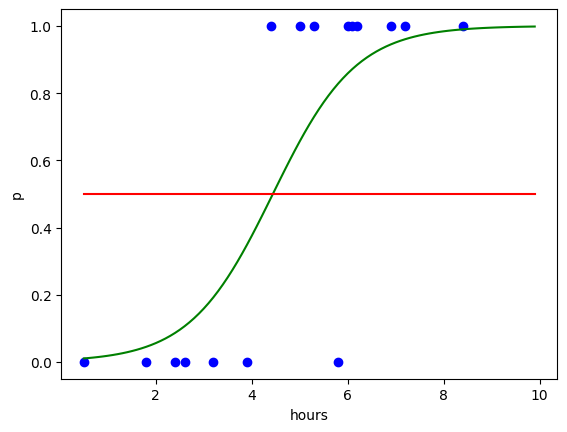

In [56]:
plt.scatter(train_x,train_y,color = 'blue')
plt.plot(x_range,p, color = 'green')
plt.plot(x_range,np.full(len(x_range),0.5), color = 'red')
plt.xlabel('hours')
plt.ylabel('p')

#### 데이터시각화(테스트세트)

Text(0, 0.5, 'p')

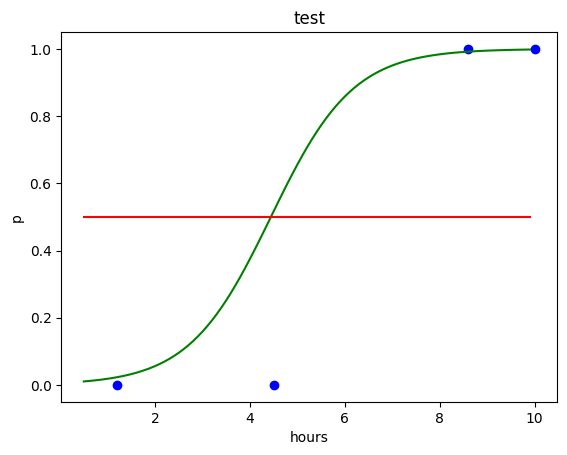

In [57]:
plt.scatter(test_x,test_y,color = 'blue')
plt.plot(x_range,p, color = 'green')
plt.plot(x_range,np.full(len(x_range),0.5), color = 'red')
plt.title('test')
plt.xlabel('hours')
plt.ylabel('p')

In [58]:
classifier.predict_proba([[4.5]]) 
#모델에서는 약 51% 확률로 합격을 예측하지만 실제로는 불합격 

array([[0.48307854, 0.51692146]])

## 혼동행렬(Confusion Matrix)

In [61]:
from sklearn.metrics import confusion_matrix

In [63]:
cm = confusion_matrix(test_y,y_pred)
cm

#TRUE NEGATIVE(TN)                      #FALSE POSITIVE(FP)
# 0(불합격)일것을 예측했는데            #1(합격)일것을 예측했는데
# 0인것(불합격)                         #0(불합격)인것

#FALSE NEGATIVE(FN)                     #TRUE POSITIVE(TP)
# 0(불합격)일것을 예측했는데             #1(합격)일것을 예측했는데
# 1(합격)인것                            #1(합격)인것 

array([[1, 1],
       [0, 2]], dtype=int64)